In [50]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import seaborn as sns
from scipy.stats import binom

Exercise H8.2: Variability of classification

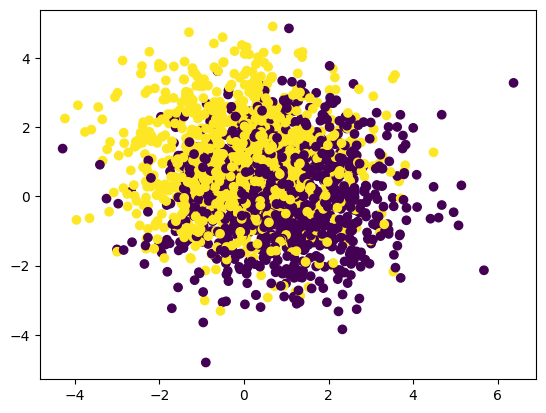

In [89]:
from scipy.stats import multivariate_normal

np.random.seed(0)

# Define mean vectors
mu1 = np.array([0,1])#.reshape(-1,1)
mu2 = np.array([1,0])#.reshape(-1,1)

# Define covariance matrix (identity matrix in this case)
cov = np.eye(2)

# Number of samples
p = 2000

# Generate samples from cluster 1
# c1_samples = multivariate_normal.rvs(mean=mu1.ravel(), cov=cov, size=p//2)

# # Generate samples from cluster 2
# c2_samples = multivariate_normal.rvs(mean=mu2.ravel(), cov=cov, size=p//2)


c1_samples = np.random.multivariate_normal([0,1], cov = [[2,0],[0,2]], size=p//2)
c2_samples = np.random.multivariate_normal([1,0], cov = [[2,0],[0,2]], size=p//2)
# c2_samples = np.random.multivariate_normal(mean=mu2, cov=cov, size=p/2)


# Assign labels
c1_labels = np.ones(p//2)
c2_labels = -np.ones(p//2)

# Combine samples and labels into one array for each cluster randomly
c1 = np.hstack((c1_samples, c1_labels.reshape(-1,1)))
c2 = np.hstack((c2_samples, c2_labels.reshape(-1,1)))

#Combine clusters randomly
data = np.vstack((c1,c2))
np.random.shuffle(data)

#plot data
plt.scatter(data[:,0], data[:,1], c=data[:,2])
plt.show()




In [90]:
data.shape

X = data[:,:2].T
y_true = data[:,2].reshape(1,-1)
W = np.linalg.inv(X@X.T )@X@y_true.T

W.shape

#predictions
y_pred = np.sign(W.T@X)

#accuracy
r_train = np.sum(y_pred == y_true)/y_true.shape[1]
print(r_train)

# #plot W and data
# plt.scatter(data[:,0], data[:,1], c=data[:,2])
# plt.plot([0, -W[1]/W[0]], [-W[1]/W[0], 0], 'r-', lw=2)
# plt.show()

#generate 1000 samples from the same distribution for testing

c1_samples_test = np.random.multivariate_normal([0,1], cov = [[2,0],[0,2]], size=1000//2)
c2_samples_test = np.random.multivariate_normal([1,0], cov = [[2,0],[0,2]], size=1000//2)

# # Assign labels
c1_labels_test = np.ones(1000//2)
c2_labels_test = -np.ones(1000//2)


#Test data

X_test = np.vstack((c1_samples_test, c2_samples_test)).T
y_test = np.hstack((c1_labels_test, c2_labels_test)).reshape(1,-1)


#predictions    
y_pred_test = np.sign(W.T@X_test)

#accuracy
r_test = np.sum(y_pred_test == y_test)/y_test.shape[1]
print(r_test)



0.6955
0.666


p =  3
Average accuracy train:  1.0
Average accuracy test:  0.58758
Average W:  [[-0.20346635]
 [ 0.6358635 ]]


p =  4
Average accuracy train:  0.9225
Average accuracy test:  0.59247
Average W:  [[-0.23475936]
 [ 0.43130544]]


p =  6
Average accuracy train:  0.8716666666666667
Average accuracy test:  0.6030666666666668
Average W:  [[-0.24434465]
 [ 0.35657959]]


p =  8
Average accuracy train:  0.851875
Average accuracy test:  0.615275
Average W:  [[-0.24291881]
 [ 0.32890999]]


p =  10
Average accuracy train:  0.8306999999999999
Average accuracy test:  0.6218440000000001
Average W:  [[-0.24232905]
 [ 0.30551196]]


p =  20
Average accuracy train:  0.8110833333333333
Average accuracy test:  0.62878
Average W:  [[-0.23556748]
 [ 0.28961848]]


p =  40
Average accuracy train:  0.7932142857142858
Average accuracy test:  0.6361914285714285
Average W:  [[-0.22891681]
 [ 0.27646282]]


p =  100
Average accuracy train:  0.7819125
Average accuracy test:  0.6425475
Average W:  [[-0.22705395]

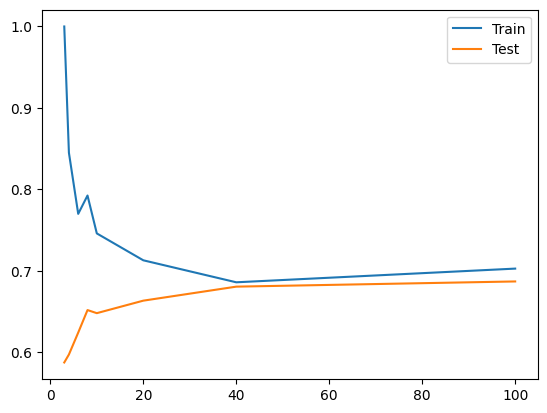

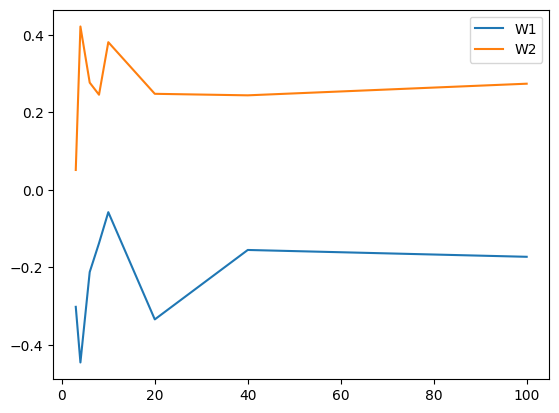

In [159]:
#repeat the steps 50 times for p=[3, 4, 6, 8, 10, 20, 40, 100] 

accuracy_test = []
accuracy_train = []
W_list = []

for p in [3, 4, 6, 8, 10, 20, 40, 100]:
    
    for i in range(50):
        #Train Data
        
        c1_samples = np.random.multivariate_normal([0,1], cov = [[2,0],[0,2]], size=p//2)
        c2_samples = np.random.multivariate_normal([1,0], cov = [[2,0],[0,2]], size=p//2)
        
        c1_labels = np.ones(p//2)
        c2_labels = -np.ones(p//2)
        
        c1 = np.hstack((c1_samples, c1_labels.reshape(-1,1)))
        c2 = np.hstack((c2_samples, c2_labels.reshape(-1,1)))
        
        data = np.vstack((c1,c2))
        np.random.shuffle(data)
        
        X = data[:,:2].T
        y_true = data[:,2].reshape(1,-1)
        W = np.linalg.inv(X@X.T)@X@y_true.T
        
        #Predictions train
        y_pred = np.sign(W.T@X)

        #accuracy train
        r_train = np.sum(y_pred == y_true)/y_true.shape[1]
        
        #generate 1000 samples from the same distribution for testing

        c1_samples_test = np.random.multivariate_normal([0,1], cov = [[2,0],[0,2]], size=1000//2)
        c2_samples_test = np.random.multivariate_normal([1,0], cov = [[2,0],[0,2]], size=1000//2)
        
        # # Assign labels
        c1_labels_test = np.ones(1000//2)
        c2_labels_test = -np.ones(1000//2)
        
        #Test data
        
        X_test = np.vstack((c1_samples_test, c2_samples_test)).T
        y_test = np.hstack((c1_labels_test, c2_labels_test)).reshape(1,-1)
        
        
        #predictions    
        y_pred_test = np.sign(W.T@X_test)
        
        #accuracy
        r_test = np.sum(y_pred_test == y_test)/y_test.shape[1]
    
        accuracy_test.append(r_test)
        accuracy_train.append(r_train)
        W_list.append(W)

    print('p = ', p)    
    print('Average accuracy train: ', np.mean(accuracy_train))
    print('Average accuracy test: ', np.mean(accuracy_test))
    print('Average W: ', np.mean(W_list, axis=0))
    print('')
    print('')
    
accuracy_train = np.array(accuracy_train)
accuracy_train = accuracy_train.reshape(8,50)
mean_accuracy_train = np.mean(accuracy_train, axis=1)
accuracy_test = np.array(accuracy_test)
accuracy_test = accuracy_test.reshape(8,50)
mean_accuracy_test = np.mean(accuracy_test, axis=1)

p=[3, 4, 6, 8, 10, 20, 40, 100] 

#plot accuracy
plt.plot(p, mean_accuracy_train, label='Train')
plt.plot(p, mean_accuracy_test, label='Test')
plt.legend()
plt.show()

#plot W
W_list = np.array(W_list)
W_list = W_list.reshape(400,2)

w1 = W_list[:,0]
w2 = W_list[:,1]


w1_mean = w1.reshape(50,8)
w1_mean = np.mean(w1_mean, axis=0)
w1_mean.shape

w2_mean = w2.reshape(50,8)
w2_mean = np.mean(w2_mean, axis=0)
w2_mean.shape

#plot the mean W for each p
plt.plot(p, w1_mean, label='W1')
plt.plot(p, w2_mean, label='W2')
plt.legend()
plt.show()


Exercise H8.3: The Binomial Distribution

a) Visualize the probability mass function f(k;n,p) of the binomial distribution for a few different values of k, n, p that demonstrate the different shapes that function can have.

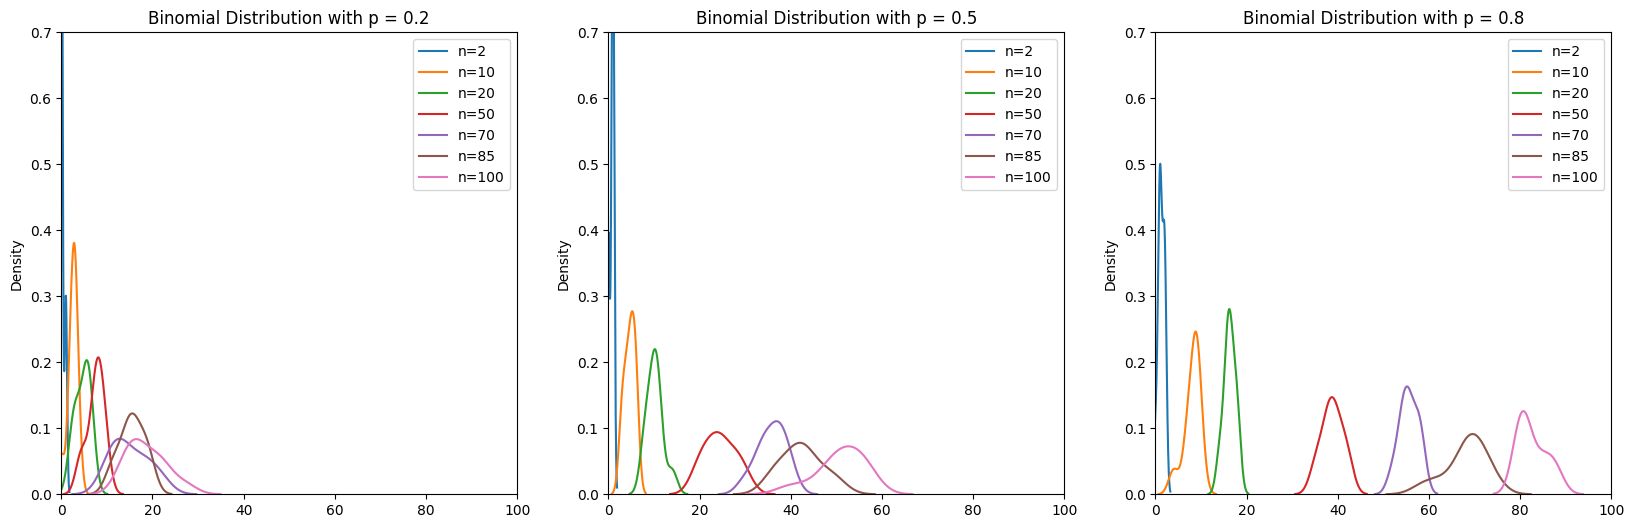

In [89]:
#Bernoulli distribution

p = [0.2,0.5,0.8]
k = np.linspace(0,100,1000)
n = [2,10,20,50,70,85,100]

fig3 = plt.figure(figsize=(20,6))
#add three subplots
ax1 = fig3.add_subplot(131)
for i in n:
    sns.kdeplot(np.random.binomial(i, 0.20,size=10), label=f'n={i}')
plt.title(f'Binomial Distribution with p = {0.2}')
#start the x axis from 0
plt.xlim(0,100) 
#scale the y axis  
plt.ylim(0,0.7)
plt.legend()

ax2 = fig3.add_subplot(132)
for i in n:
    sns.kdeplot(np.random.binomial(i, 0.50,size=10), label=f'n={i}')
plt.title(f'Binomial Distribution with p = {0.5}')
#start the x axis from 0
plt.xlim(0,100) 
#scale the y axis  
plt.ylim(0,0.7)
plt.legend()

ax3 = fig3.add_subplot(133)
for i in n:
    sns.kdeplot(np.random.binomial(i, 0.80,size=10), label=f'n={i}')
plt.title(f'Binomial Distribution with p = {0.8}')

#start the x axis from 0
plt.xlim(0,100) 
#scale the y axis  
plt.ylim(0,0.7)
plt.legend()
plt.show()
    

b) The normal distribution is sometimes used as an approximation to the binomial distribution. Under which conditions is this reasonable? Under which conditions is it prob- lematic? Visualize one example where the Normal approximation is good and one where it is not. Give at least one reason why this distribution is so widely used.

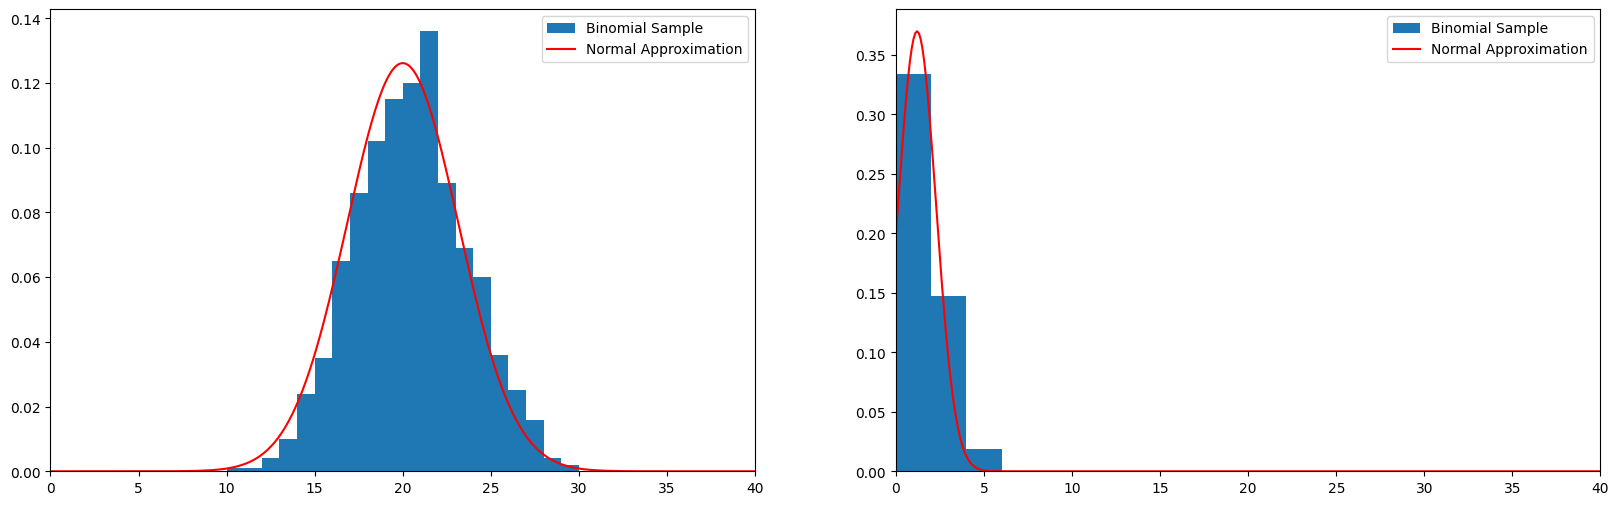

In [218]:
from scipy.stats import binom, norm

fig5 = plt.figure(figsize=(20,6))

ax1 = fig5.add_subplot(121)
# Set the sample size and probability of success
n = 40
p = 0.5

# Generate a random sample from the binomial distribution
binom_sample = binom.rvs(n=n, p=p, size=1000)

# Calculate the mean and standard deviation of the binomial sample
binom_mean = n*p
binom_std = np.sqrt(n*p*(1-p))

# Generate a normal approximation to the binomial distribution
norm_sample = norm.rvs(loc=binom_mean, scale=binom_std, size=1000)

# Plot the binomial sample and normal approximation on a histogram
plt.hist(binom_sample, bins=20, density=True, label='Binomial Sample')
# Plot the normal approximation on the same histogram as a red line
plt.plot(np.linspace(0, 100, 1000), norm.pdf(np.linspace(0, 100, 1000), loc=binom_mean, scale=binom_std), color='red', label='Normal Approximation')

#Einstellungen
plt.legend()
plt.xlim(0,40)


ax2 = fig5.add_subplot(122)
# Set the sample size and probability of success
n = 40
p = 0.03

# Generate a random sample from the binomial distribution
binom_sample = binom.rvs(n=n, p=p, size=1000)

# Calculate the mean and standard deviation of the binomial sample
binom_mean = n*p
binom_std = np.sqrt(n*p*(1-p))

# Generate a normal approximation to the binomial distribution
norm_sample = norm.rvs(loc=binom_mean, scale=binom_std, size=1000)

# Plot the binomial sample and normal approximation on a histogram
plt.hist(binom_sample, bins=3, density=True, label='Binomial Sample')
# Plot the normal approximation on the same histogram as a red line
plt.plot(np.linspace(0, 100, 1000), norm.pdf(np.linspace(0, 100, 1000), loc=binom_mean, scale=binom_std), color='red', label='Normal Approximation')

#Einstellungen
plt.legend()
plt.xlim(0,40)


plt.show()


The normal distribution can be a good approximation to the binomial distribution when the sample size (n) is large and the probability of success (p) is not too close to 0 or 1. In general, if np > 5 and n(1-p) > 5, then the normal distribution can be used as an approximation.

One example where the normal approximation is good is when the sample size is 100 and the probability of success is 0.5. In this case, the binomial distribution is very close to the normal distribution with a mean of 50 and a standard deviation of 5.

One example where the normal approximation is problematic is when the sample size is 5 and the probability of success is 0.1. In this case, the binomial distribution is quite different from the normal distribution with a mean of 0.5 and a standard deviation of 0.7.

The normal distribution is widely used because it is a continuous, symmetric distribution with a well-defined mean and standard deviation. It is also a limiting distribution of many other distributions, such as the binomial distribution, which makes it a useful tool for approximating these other distributions.

c) The Poisson distribution is often used as an alternative approximation to the bi- nomial distribution. Under which conditions is it a good approximation? Visualize one example parametrization where the Poisson approximation is good and one where it is not.

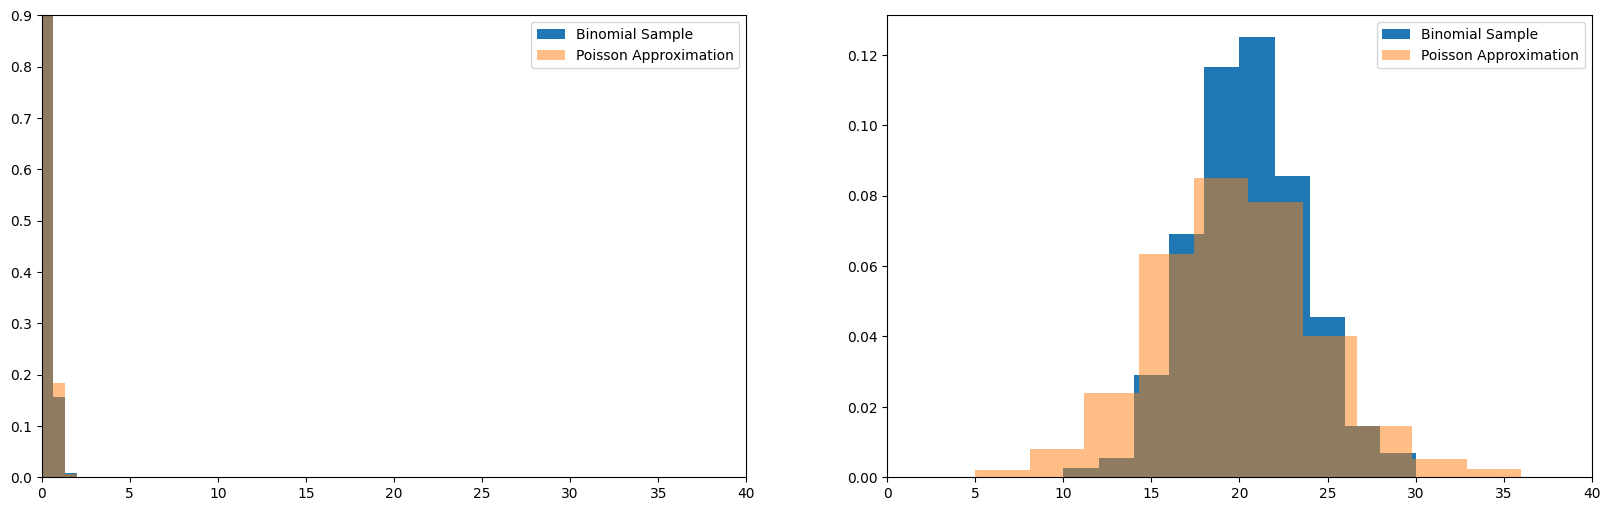

In [219]:
from scipy.stats import binom, poisson
import matplotlib.pyplot as plt

fig6 = plt.figure(figsize=(20,6))

ax1 = fig6.add_subplot(121)

# Set the sample size and probability of success
n = 40
p = 0.003

# Generate a random sample from the binomial distribution
binom_sample = binom.rvs(n=n, p=p, size=1000)

# Calculate the mean of the binomial sample
binom_mean = n*p

# Generate a Poisson approximation to the binomial distribution
poisson_sample = poisson.rvs(mu=binom_mean, size=1000)

# Plot the binomial sample and Poisson approximation on a histogram
plt.hist(binom_sample, bins=3, density=True, label='Binomial Sample')
# Plot the Poisson approximation on the same histogram as a red line
plt.hist(poisson_sample, bins=3, density=True, alpha=0.5, label='Poisson Approximation')
# plt.plot(np.linspace(0, 100, 1000), poisson.pmf(np.linspace(0, 100, 1000), mu=binom_mean), color='red', label='Poisson Approximation')
plt.legend()
#start the x axis from 0
plt.xlim(0,40)
#scale the y axis
plt.ylim(0,0.9)

ax2 = fig6.add_subplot(122)
# Set the sample size and probability of success
n = 40
p = 0.5

# Generate a random sample from the binomial distribution
binom_sample = binom.rvs(n=n, p=p, size=1000)

# Calculate the mean of the binomial sample
binom_mean = n*p

# Generate a Poisson approximation to the binomial distribution
poisson_sample = poisson.rvs(mu=binom_mean, size=1000)

# Plot the binomial sample and Poisson approximation on a histogram
plt.hist(binom_sample, bins=10, density=True, label='Binomial Sample')
# Plot the Poisson approximation on the same histogram as a red line
plt.hist(poisson_sample, bins=10, density=True, alpha=0.5, label='Poisson Approximation')
# plt.plot(np.linspace(0, 100, 1000), poisson.pmf(np.linspace(0, 100, 1000), mu=binom_mean), color='red', label='Poisson Approximation')
plt.legend()

#start the x axis from 0
plt.xlim(0,40)
#scale the y axis
# plt.ylim(0,0.9)

plt.show()

The Poisson distribution can be a good approximation to the binomial distribution when the sample size (n) is large and the probability of success (p) is small. In general, if n*p is small (typically less than 10), then the Poisson distribution can be used as an approximation.